In [2]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import linalg, optimize, integrate, stats

mean = -0.00410; std. deviation = 1.99689


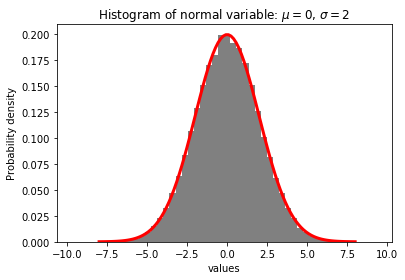

In [5]:
mu = 0
sigma = 2
n = int(1e5)

v = stats.norm.rvs(loc=mu, scale=sigma, size=n)
# numpy.random.normal(loc=mu, scale=sigma, size=10000) would also work

# Computing mean and standard deviation
print("mean = {0:.5f}; std. deviation = {1:.5f}".format(np.mean(v), np.std(v)))

num_bins = 50

# the histogram of the data
plt.hist(v, num_bins, normed=1, histtype='stepfilled', color = 'gray')

# normal pdf
normpdf = lambda x: (1/math.sqrt(2*math.pi*sigma**2))*math.exp(-(x-mu)**2/(2*sigma**2))
x = np.linspace(-8,8,100)
y =  [y for y in map(normpdf, x)]
plt.plot(x, y, 'r', linewidth=3)

plt.xlabel('values')
plt.ylabel('Probability density')
plt.title(r'Histogram of normal variable: $\mu=0$, $\sigma=2$')

plt.show()

In [6]:
x = np.linspace(0,4,5)
size = np.logspace(0,4,5)
draws = 100
mu = 0
sigma = 1

DATA=[]

for s in size:
    d = np.random.normal(loc=mu, scale=sigma, size=(draws, int(s)))
    DATA.append(d.mean(axis=1))

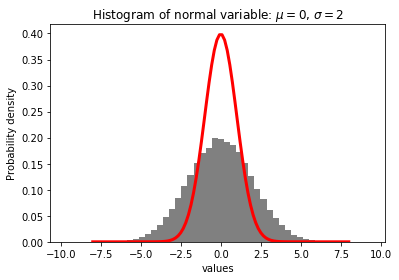

In [7]:
num_bins = 50

# the histogram of the data
plt.hist(v, num_bins, normed=1, histtype='stepfilled', color = 'gray')

# normal pdf
normpdf = lambda x: (1/math.sqrt(2*math.pi*sigma**2))*math.exp(-(x-mu)**2/(2*sigma**2))
x = np.linspace(-8,8,100)
y =  [y for y in map(normpdf, x)]
plt.plot(x, y, 'r', linewidth=3)

plt.xlabel('values')
plt.ylabel('Probability density')
plt.title(r'Histogram of normal variable: $\mu=0$, $\sigma=2$')

plt.show()

## Lei dos Grandes números
<a href="https://www.britannica.com/science/law-of-large-numbers"><i>As the number of identically distributed, randomly generated variables increases, their sample mean (average) approaches their theoretical mean.</i></a>

In [8]:
x = np.linspace(0,4,5)
size = np.logspace(0,4,5)
draws = 100
mu = 0
sigma = 1

DATA=[]

for s in size:
    d = np.random.normal(loc=mu, scale=sigma, size=(draws, int(s)))
    DATA.append(d.mean(axis=1))

In [9]:
print(np.logspace(0,4,5))

[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


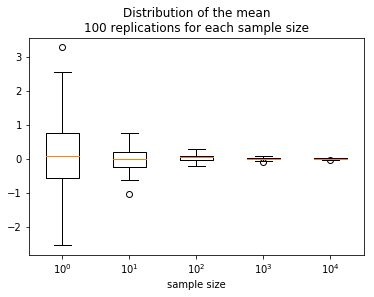

In [10]:
plt.boxplot(DATA)
plt.xticks([1, 2, 3, 4, 5], ['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$'])
plt.xlabel('sample size')
plt.title("Distribution of the mean\n{0} replications for each sample size".format(draws))
plt.show()

## Teorema do Limite Central

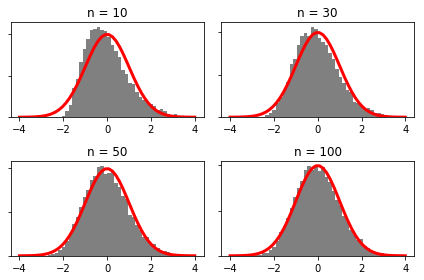

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 50
draws = int(1e4)

k = 0.5
theta = 1.0
mu = k*theta
sigma = math.sqrt(k)*theta

S = [10, 30, 50, 100]

fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.flatten()

# normal pdf
normpdf = lambda x: (1/math.sqrt(2*math.pi))*math.exp(-x**2/2)
t = np.linspace(-4,4,50)
y =  [y for y in map(normpdf, t)]

for i, x in enumerate(ax):
    n = S[i]
    s = np.random.gamma(shape = k, scale = theta, size = (draws, n))
    s = (np.mean(s, axis=1)-mu)/(sigma/math.sqrt(n))
    x.hist(s, n_bins, range = (-4, 4), normed=1, histtype='stepfilled', color = 'gray')
    x.plot(t, y, 'r', linewidth=3)
    x.set_yticklabels([])
    x.set_title('n = {0}'.format(n))

fig.tight_layout()
plt.show()

<b>Size distortion of hypothesis tests in small samples</b>:

Suppose $x \sim \Gamma(.5, 1)$. Then $E(x)=.5$

Hypothesis testing:

$H_{0}: E(x)=.5$

$H_{1}: E(x)\neq.5$

Take for granted that $Var(x)=.5$.

Level of significance ($\alpha$) = 5%: <i>probability of rejecting the null hypothesis when it is true.</i>

Given a i.i.d. sample of $n$ values drawn ($\{x_{1}, x_{2},..., x_{n}\}$), compute the test statistic
$$z = \sqrt{n}\frac{\bar{x}-.5}{\sigma},$$
where $\bar{x}=\frac{\sum_{i=1}^{n}{x_{i}}}{n}$ and $\sigma=\sqrt{.5}$.

Then we choose a critical value $z_{c}$ such that $Prob(|z|>z_{c})=\alpha$ __under the null hypothesis__. If $z \sim N(0,1)$, $z_c=1.96$ (type <code>"{0:.3f}".format(stats.norm.ppf(.975, loc=0, scale=1))</code>). If $|z|>z_{c}$ in the sample, we reject the null hypothesis.

z is __not__ distributed as a standard normal (as is the case when $x \sim \Gamma(.5, 1)$ and n is 'small'), with what frequency will we reject the null when it is in fact true? 